# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


### Attribute Information:

- age - Age of the patient
- gender - Gender of the patient
- *tot_bilirubin* - Total Bilirubin
- *direct_bilirubin* - Direct Bilirubin
- alkphos - Alkaline Phosphotase
- sgpt - Alamine Aminotransferase
- sgot - Aspartate Aminotransferase
- *tot_proteins* - Total Protiens
- albumin - Albumin
- *ag_ratio* - Albumin and Globulin Ratio
- is_patient Selector field used to split the data into two sets (labeled by the experts)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
# Посмотрим на выбросы в df

df_info_null = data.isnull().sum()

print(df_info_null, '\n')
print('Итого выбросов: {}'.format(df_info_null.sum()))

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64 

Итого выбросов: 4


В dataset(indian_liver_patient) присутствуют выбросы в Albumin_and_Globulin_Ratio = 4. Удалим, чтобы они не повлияли на дальнейшую работу с dataset.

In [5]:
data_ilp = data.dropna() # Далее будем работать с data_ilp

print('Итого выбросов: {}'.format(data_ilp.isnull().sum().sum()))

Итого выбросов: 0


Также в data_ilp в столбце "Gender" значения являются текстовым, давайте заменим его на числовое, где Female = 0, a Male = 1

In [6]:
data_ilp.replace({'Gender': 'Male'}, {'Gender': 1}, inplace=True)
data_ilp.replace({'Gender': 'Female'}, {'Gender': 0}, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [7]:
# Теперь можно приступить к анализу df

data_ilp.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


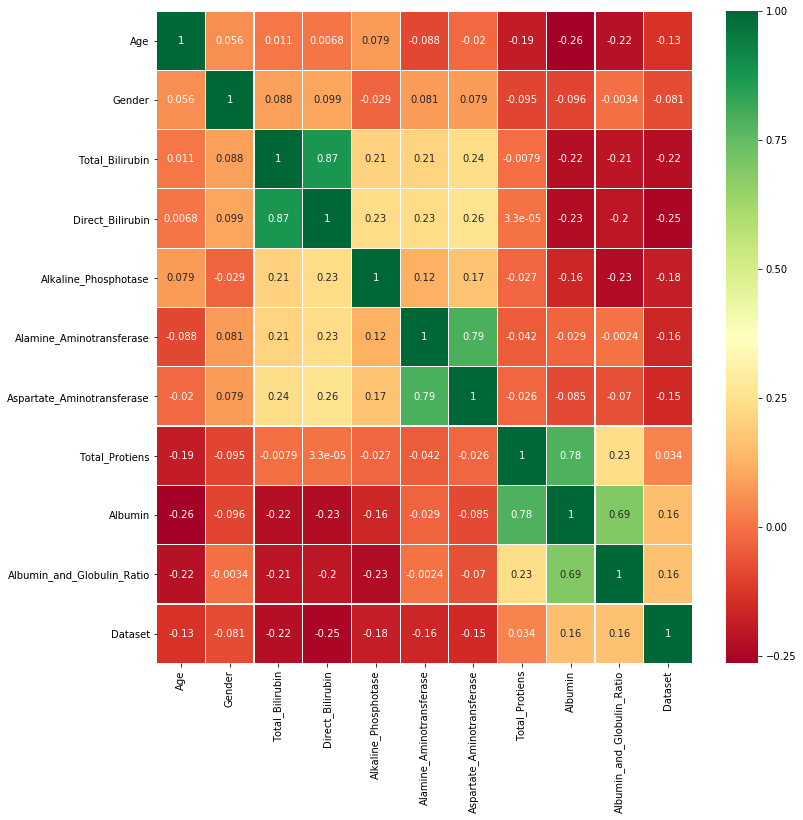

In [8]:
# Построим матрицу корреляции Пирсона

sns.heatmap(data_ilp.corr(method='pearson'),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

* Можно увидеть что между Direct_Bilirubin и Total_Bilirubin прослеживается хорошая корреляция
* Также посмотрим значения по Albumin_and_Globulin_Ratio и Total_Bilirubin

In [12]:
corr1, p_value = pearsonr(data_ilp['Direct_Bilirubin'], data_ilp['Total_Bilirubin'])
print(corr1)

corr, p_value = pearsonr(data_ilp['Albumin_and_Globulin_Ratio'], data_ilp['Direct_Bilirubin'])
print(corr)

0.8744809688474301
-0.20012468524933932


#### Построить одномерную линейную регрессию Direct_Bilirubin и Albumin_and_Globulin_Ratio. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

Intercept - коэффициент b в уравнении прямой y=kx+b

slope - коэффициент k в уравнении прямой y=kx+b

In [29]:
from sklearn.linear_model import LinearRegression

Direct_Bilirubin = data_ilp['Direct_Bilirubin']
Total_Bilirubin = data_ilp['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Total_Bilirubin).reshape(-1,1), Direct_Bilirubin)

print('Intercept:', model.intercept_)
print('slope:', model.coef_)

Intercept: 0.18294498093968814
slope: [0.39548596]


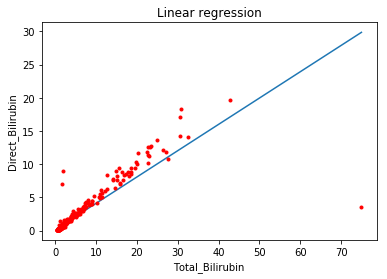

In [30]:
plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Linear regression')
x = np.linspace(min(Total_Bilirubin), max(Total_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Total_Bilirubin, Direct_Bilirubin, 'r.')
plt.show()

Построем тоже самое через sns.regplot, чтобы убедиться что мы построили все верно

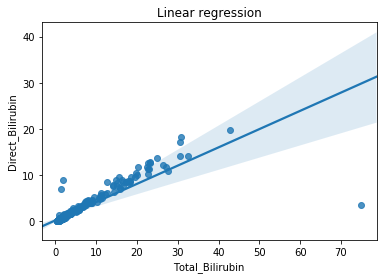

In [31]:
sns.regplot(x=Total_Bilirubin, y=Direct_Bilirubin ,data=data_ilp, fit_reg=True)
plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Linear regression')
plt.show()

Поскольку мы строили линейную регрессию по Total_Bilirubin и Direct_Bilirubin, давайте попробуем предсказать несколько значений. 

Впишем значение Total_Bilirubin и попробуем получить Direct_Bilirubin

In [20]:
data_ilp[1:3]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [32]:
print(model.predict(np.array([10.9]).reshape(-1, 1)))
print(model.predict(np.array([7.3]).reshape(-1, 1)))

[4.49374199]
[3.06999252]


Как можно увидеть, прогноз довольно приближен к истине

#### Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

In [35]:
data_ilp.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [36]:
x_1 = data_ilp['Albumin_and_Globulin_Ratio']
x_2 = data_ilp['Direct_Bilirubin']
Dataset = data_ilp['Dataset']

# Строим вектор x
x = np.vstack([np.array(x_1), np.array(x_2)]).T

# Значение болезни
y = np.array(Dataset)

model = LinearRegression().fit(x, y)

# Коэфициенты линейной регрессии
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.1795319843549186
slope: [ 0.16765337 -0.03569731]


Можно заметить, что у Dataset есть зависимость от Albumin_and_Globulin_Ratio (0.167) и зависитость от Direct_Bilirubin (-0.035)

Также давайте посмотрим на матрицу корреляции Пирсона и сравним полученный результат
- Dataset с Albumin_and_Globulin_Ratio = 0.16 , что является самой сильной корреляцией во всей матрице по Dataset
- Dataset с Direct_Bilirubin = -0.035 , что является слабой корреляцией по Dataset

In [39]:
data_ilp[0:2]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1


Давайте сравним предсказание, которое строит наша мат.модель с таблицей и посмотрим верно ли оно

In [40]:
print('Предсказание модели:', model.predict(x[0:2]))

Предсказание модели: [1.32685028 1.10726027]


In [41]:
print(model.predict(np.array([[0.90, 0.1]])))
print(model.predict(np.array([[0.74, 5.5]])))

[1.32685028]
[1.10726027]


Как можно заметить что люди с индексом от 0 до 2 имеют значение Dataset = 1, и наша модель дала значение ~1.2, исходя из этого можно сделать вывод, что значение предсказания приближено к , что сходится с реальными данными из Dataset

#### Посчитать квартили для всех колонок. 

In [64]:
data_ilp.quantile([.10, .25, .50, .75], axis = 0)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,1.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,1.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.100,2.0


In [96]:
data_ilp.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Квартили описывают рассеянность данных относительно середины выборки. Интеркварти́льным размахом (англ. Interquartile range) называется разность между третьим и первым квартилями, то есть x_0,75-x_0,25. Интерквартильный размах является характеристикой разброса распределения величины и является робастным аналогом дисперсии. Вместе, медиана и интерквартильный размах могут быть использованы вместо математического ожидания и дисперсии в случае распределений с большими выбросами, либо при невозможности вычисления последних.

#### Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

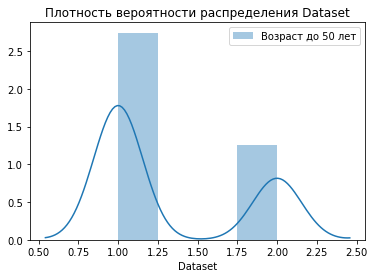

Среднее значение: 1.3142857142857143
Квартиль 0.5    1.0
Name: Dataset, dtype: float64


In [81]:
ilp_age = data_ilp[data_ilp['Age']<=49]['Dataset']
sns.distplot(ilp_age)

plt.title('Плотность вероятности распределения Dataset')
plt.legend(['Возраст до 50 лет'])

plt.show()

print("Среднее значение:", ilp_age.mean())
print("Квартиль", ilp_age.quantile([.50]))

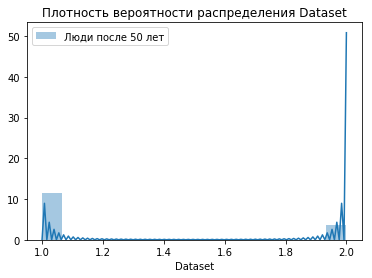

Среднее значение: 1.240174672489083
Квартиль 0.5    1.0
Name: Dataset, dtype: float64


In [82]:
ilp_Age = data_ilp[data_ilp['Age']>=50]['Dataset']
sns.distplot(ilp_Age)

plt.title('Плотность вероятности распределения Dataset')
plt.legend(['Люди после 50 лет'])

plt.show()

print("Среднее значение:", ilp_Age.mean())
print("Квартиль", ilp_Age.quantile([.50]))

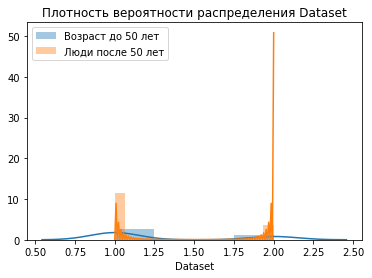

In [83]:
ilp_age = data_ilp[data_ilp['Age']<=49]['Dataset']
ilp_Age = data_ilp[data_ilp['Age']>=50]['Dataset']

sns.distplot(ilp_age)
sns.distplot(ilp_Age)

plt.title('Плотность вероятности распределения Dataset')
plt.legend(['Возраст до 50 лет', 'Люди после 50 лет'])

plt.show()

Инфорация по двум выборкам: Можно заметить что группа "до 50" имеет в большинстве значение Dataset = 1, когда группа "после 50" наоборот имеет в большинстве значение Dataset = 2

Среднее значение двух выборок: Можно заметить, что они рассеяны практически одинаковы, но в первом случае коэффициент немного больше второго, но это не значительно.

Квартили двух выборок: Можно заметить, что они рассеяны одинаково.

#### Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [77]:
ilp = data_ilp[data_ilp['Dataset']==2]['Total_Bilirubin']
stats.ttest_1samp(ilp, data_ilp['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.615411977932304, pvalue=1.4695954513944632e-63)

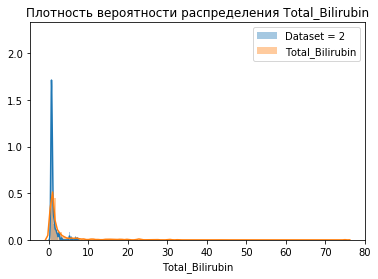

165


In [86]:
ilp = data_ilp[data_ilp['Dataset']==2]['Total_Bilirubin']
testilp = data['Total_Bilirubin']
sns.distplot(ilp)
sns.distplot(testilp)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['Dataset = 2', 'Total_Bilirubin'])
plt.show()

print(len(ilp))

- T-значение = -27.61, и в одновыборочном критерии мы оцениваем p-value
- p-value = 1.469e-63, что намного меньше стандартной альфа ошибки 0.05 

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп

#### Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [90]:
healthy_oldpeak = data_ilp[data_ilp['Dataset']==1]['Total_Bilirubin']
ill_oldpeak = data_ilp[data_ilp['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(healthy_oldpeak, ill_oldpeak)

Ttest_indResult(statistic=5.422946004172417, pvalue=8.632557516910643e-08)

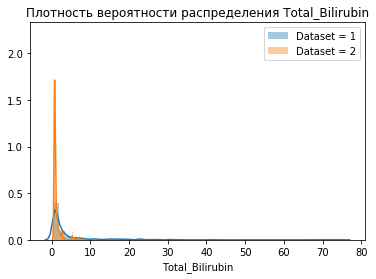

In [91]:
sns.distplot(healthy_oldpeak)
sns.distplot(ill_oldpeak)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['Dataset = 1', 'Dataset = 2'])
plt.show()

- T-значение = 5.42, (Чем выше t, тем более различны группы между собой. Чем меньше t, тем более похожи группы и результаты повторятся)
- p-value = 8.632e-08, что намного меньше стандартной альфа ошибки 0.05 

Высокий показатель t-value и низкий показатель p-value говорит о том, что группы статистически значимы

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп

#### Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [109]:
restecg_1 = data_ilp[(data_ilp['Age']>=1) & (data_ilp['Age']<=29)]['Dataset']
restecg_2 = data_ilp[(data_ilp['Age']>=30) & (data_ilp['Age']<=54)]['Dataset']
restecg_3 = data_ilp[data_ilp['Age']>=55]['Dataset']

stats.f_oneway(restecg_1, restecg_2, restecg_3)

F_onewayResult(statistic=8.893368703518503, pvalue=0.00015706998544799423)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп

In [110]:
pass